# import

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load data

In [ ]:
data = load_iris()

In [ ]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)

df['target'] = data.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Analyze data

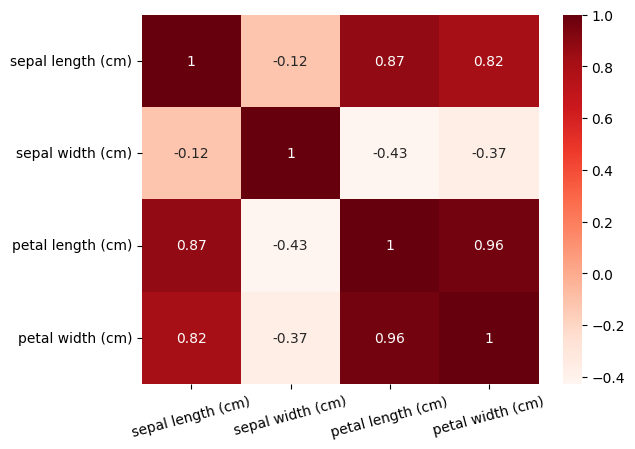

In [ ]:
correlation = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']].corr()
sns.heatmap(correlation, annot=True, cmap='Reds')
plt.xticks(rotation=15)
plt.show()

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df[df.target==0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [ ]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


**seen, the data has been sorted.**

0-49 species of setosa (target = 0)

50-99 species of versicolor (target = 1)

100-149 species of virginica (target = 2) have a variety of conditions

In [ ]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

# Feature selection

In [ ]:
X = df.drop(['target'], axis='columns')
Y = df.target

# Splitting data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Training model

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
print(knn_model.fit(X_train, Y_train))

KNeighborsClassifier(n_neighbors=3)


# Evaluating model

In [ ]:
knn_model.score(X_test, Y_test)

1.0

Getting 1.0 (100%) accuracy on the Iris dataset with the K-Nearest Neighbors (KNN) model is normal and common. The Iris dataset is quite simple and clean, consisting of 150 samples with three geometrically well-separated classes. KNN, as a proximity-based model, can easily separate these classes with very high accuracy, especially if n_neighbors (the number of neighbors) is chosen properly.

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=15) # try with different value for n_neighbors
print(knn_model.fit(X_train, Y_train))

KNeighborsClassifier(n_neighbors=15)


In [ ]:
knn_model.score(X_test, Y_test)

0.9666666666666667